<a href="https://colab.research.google.com/github/hhhhhhhhhhhhhhhhho/21-2_Capstone/blob/main/VTON/MMFASHION_virtual_try_on_test2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MMFASHION


In [ ]:
!git clone --recursive https://github.com/open-mmlab/mmfashion.git
%cd mmfashion

In [ ]:
!python setup.py install

python 3.7 안에에 mmfashion 이 생긴다.

###FIXME before start

1. x.ontiguious().view(~~) in python3.7 regression
2. normalize([0.5,],[0.5,],[0.5],) change normalize([0.5,],[0.5,]) in python 3.7 CP_VTON


### data in google drive load to colab

In [3]:
!cp -r '/content/drive/MyDrive/( 2021 - 2 ) 캡스톤/data_set/ICCV 2021/DeepFashion/Consumer-to-shop Clothes Retrieval Benchmark' '/content/mmfashion/data'
!cp -r '/content/drive/MyDrive/( 2021 - 2 ) 캡스톤/data_set/ICCV 2021/DeepFashion/Fashion Landmark Detection Benchmark' '/content/mmfashion/data'
!cp -r '/content/drive/MyDrive/( 2021 - 2 ) 캡스톤/data_set/ICCV 2021/DeepFashion/Fashion Synthesis Benchmark' '/content/mmfashion/data'
!cp -r '/content/drive/MyDrive/( 2021 - 2 ) 캡스톤/data_set/ICCV 2021/DeepFashion/In-shop Clothes Retrieval Benchmark' '/content/mmfashion/data'

In [6]:
!python /content/mmfashion/mmfashion/utils/checkpoint.py

### Virtual Try - On test

Test a virtual try-on module.

Step 1, use the geometric matching module(GMM) to generate warp-cloth and warp-mask,

 * python tools/test_virtual_tryon.py \
     --config configs/virtual_tryon/cp_vton.py \
     --stage GMM


Step 2, use the tryon module(TOM) to generate the results. The default result directory is data/VTON/result, you can modify the path in config file(line 103).

 * python tools/test_virtual_tryon.py \
     --config configs/virtual_tryon/cp_vton.py \
     --stage TOM

In [ ]:
!cp '/content/drive/MyDrive/( 2021 - 2 ) 캡스톤/AI/MMFASHION/viton_resize.tar' '/content/mmfashion/data'
!tar -xvf '/content/mmfashion/data/viton_resize.tar' '/content/mmfashion/data/vton_resize'

In [32]:
!cp '/content/drive/MyDrive/( 2021 - 2 ) 캡스톤/AI/MMFASHION/GMM_epoch_40.pth' '/content/mmfashion/checkpoint/CPVTON/GMM'
!cp '/content/drive/MyDrive/( 2021 - 2 ) 캡스톤/AI/MMFASHION/TOM_epoch_40.pth' '/content/mmfashion/checkpoint/CPVTON/TOM'

복사 한 뒤 이름을 latest.pth 로 바꿈. 

In [57]:
!python tools/test_virtual_tryon.py --config configs/virtual_tryon/cp_vton.py --stage GMM

2021-10-15 07:40:59,347 - INFO - Distributed test: False
GMM dataset loaded
/usr/local/lib/python3.7/dist-packages/mmfashion-0.4.0-py3.7.egg/mmfashion/models/feature_extractor/feature_regression.py:64: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  nn.init.normal(m.weight.data, 0.0, 0.02)
GMM model built
Use load_from_local loader
The model and loaded state dict do not match exactly

unexpected key in source state_dict: generator.unet.0.weight, generator.unet.0.bias, generator.unet.1.unet.1.weight, generator.unet.1.unet.1.bias, generator.unet.1.unet.3.unet.1.weight, generator.unet.1.unet.3.unet.1.bias, generator.unet.1.unet.3.unet.3.unet.1.weight, generator.unet.1.unet.3.unet.3.unet.1.bias, generator.unet.1.unet.3.unet.3.unet.3.unet.1.weight, generator.unet.1.unet.3.unet.3.unet.3.unet.1.bias, generator.unet.1.unet.3.unet.3.unet.3.unet.3.unet.1.weight, generator.unet.1.unet.3.unet.3.unet.3.unet.3.unet.1.bias, generator.unet.1.unet.3.unet.3.unet.3.unet.3.une

* test_pair.txt 를 찾지못하는 에러가 발생한다.

Complete
https://github.com/open-mmlab/mmfashion/issues/127


* RuntimeError: view size is not compatible with input tensor's size and stride (at least one dimension spans across two contiguous subspaces). Use .reshape(...) instead 

에러발생하면 

/usr/local/lib/python3.7/dist-packages/mmfashion-0.4.0-py3.7.egg/mmfashion/models/feature_extractor/feature_regression.py

change x.contiguous().view()

In [60]:
!python tools/test_virtual_tryon.py --config configs/virtual_tryon/cp_vton.py --stage TOM

2021-10-15 07:44:48,699 - INFO - Distributed test: False
TOM dataset loaded
TOM model built
Use load_from_local loader
load checkpoint from: checkpoint/CPVTON/TOM/latest.pth
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3613: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


## Result

In [69]:
m=Image.open('/content/mmfashion/data/VTON/result/try-on/000001_0.jpg')
np.shape(m)

(256, 192, 3)

In [81]:
import pandas as pd
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt

person = Image.open('/content/mmfashion/data/VTON/vton_resize/test/image/000001_0.jpg')
target_cloth =Image.open('/content/mmfashion/data/VTON/vton_resize/test/cloth/000001_1.jpg')
vton_image = Image.open('/content/mmfashion/data/VTON/result/try-on/000001_0.jpg')


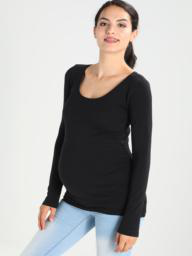

In [83]:
display(person)

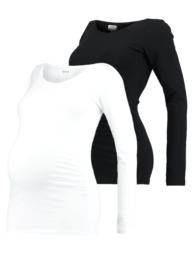

In [84]:
display(target_cloth)

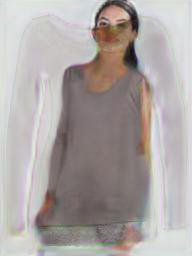

In [85]:
vton_image

### 해결책, 노이즈를 제거하기기 위해서 autoencoder 를를 사용해보는 것은 어떨까까 ?